In [37]:
%matplotlib  inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from plotting_utils import label_prep, label_sample
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

In [46]:
size_path = '/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/fragment_sizes'
f_files = glob.glob(size_path + '/*.feather')
df = pd.concat(map(lambda x: pd.read_feather(x)\
                       .assign(prep = os.path.basename(x)), 
                   f_files))  \
    .assign(prep = lambda d: d.prep.str.replace('.feather$',''))\
    .query('isize < 500')\
    .assign(size_fraction = lambda d: d.groupby('bed').size_count.transform(lambda x: 100*x/x.sum()))\
    .groupby(['prep','isize'], as_index=False)\
    .agg({'size_fraction':'median'})  \
    .assign(prep = lambda d: d.prep.map(label_prep))
df.head()

,prep,isize,size_fraction
0,alkaline_hydrolysis,15,0.001886
1,alkaline_hydrolysis,16,0.005756
2,alkaline_hydrolysis,17,0.012981
3,alkaline_hydrolysis,18,0.014306
4,alkaline_hydrolysis,19,0.013090


/stor/work/Lambowitz/cdw2854/src/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


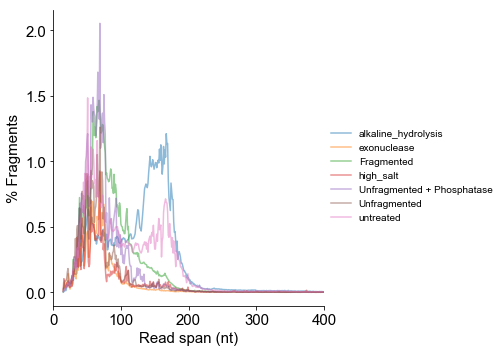

In [47]:
p = sns.FacetGrid(data = df\
                      .pipe(lambda d: d[~d.prep.str.contains('genome|[Pp]oly')])\
                      .pipe(lambda d: d[d.prep.str.contains('.*')]), 
                  hue = 'prep',
                 size = 5)
p.map(plt.plot, 'isize',  'size_fraction', alpha=0.5)
p.set(xlim=(0,400))
p.add_legend(title='')
p.set_axis_labels('Read span (nt)', '% Fragments')